In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True)

In [13]:
X = df['data']
y = df['target']

In [14]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
print(df['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [19]:
decision_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


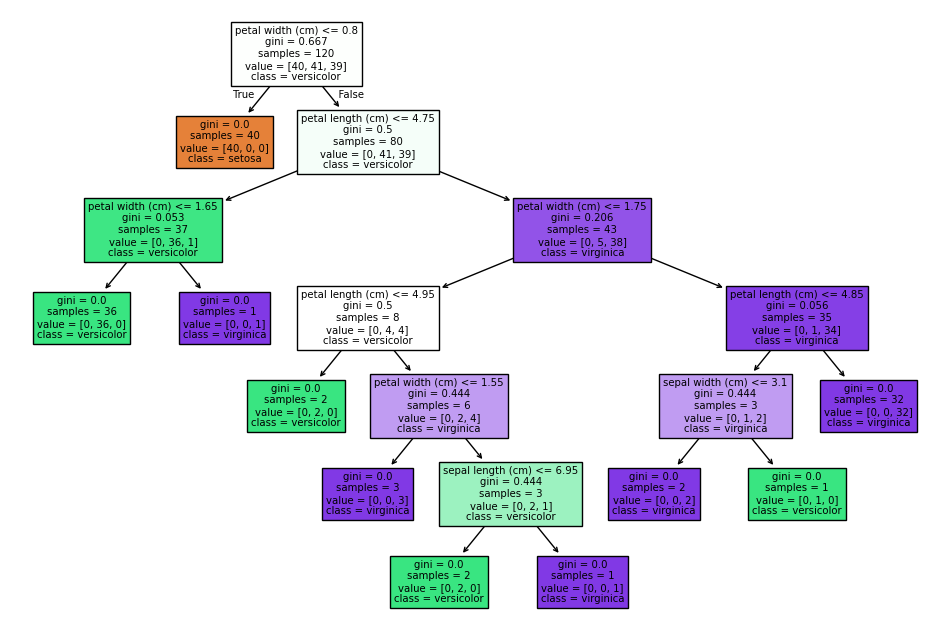

In [20]:
# Visualization of Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=df['target_names'])
plt.show()

In [ ]:
# Let's prune the tree to avoid overfitting and compare both models
decision_tree_pruned = DecisionTreeClassifier(max_depth=2)
decision_tree_pruned.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


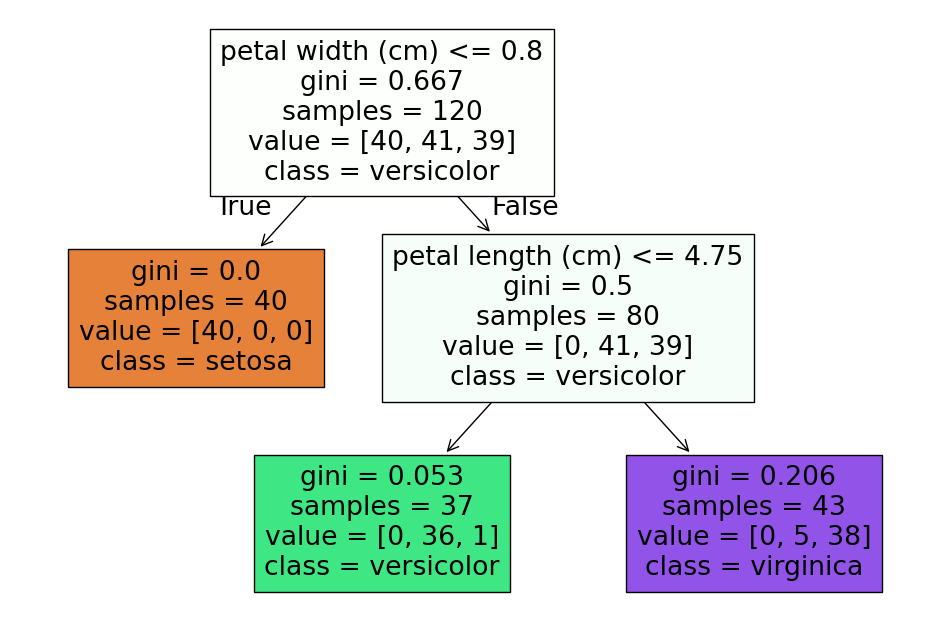

In [26]:
plt.figure(figsize=(12,8))
plot_tree(decision_tree_pruned, filled=True, feature_names=X.columns, class_names=df['target_names'])
plt.show()

In [29]:
# let's evaluate the model and compare both models
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = decision_tree.predict(X_test)
y_pred_pruned = decision_tree_pruned.predict(X_test)
print("Accuracy of unpruned tree:", accuracy_score(y_test, y_pred))
print("Confusion Matrix of unpruned tree:\n", confusion_matrix(y_test, y_pred))
print("Accuracy of pruned tree:", accuracy_score(y_test, y_pred_pruned))
print("Confusion Matrix of pruned tree:\n", confusion_matrix(y_test, y_pred_pruned))

Accuracy of unpruned tree: 1.0
Confusion Matrix of unpruned tree:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of pruned tree: 0.9666666666666667
Confusion Matrix of pruned tree:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


### Conslusion
### The pruned tree may have slightly lower accuracy but is less likely to overfit and generalizes better to unseen data.

# Lets see Pre pruning by using all Hyperparameter tuning

In [34]:
params = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [2, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [36]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [37]:
grid_search.best_score_

np.float64(0.9666666666666666)

In [38]:
y_pred = grid_search.predict(X_test)
print("Accuracy of tuned tree:", accuracy_score(y_test, y_pred))
print("Confusion Matrix of tuned tree:\n", confusion_matrix(y_test, y_pred))

Accuracy of tuned tree: 0.9666666666666667
Confusion Matrix of tuned tree:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
